In [16]:
from PIL import Image

img = Image.open("bild1.jpg")
img = img.resize((round(img.size[0] / 10), round(img.size[1] / 10)), resample=Image.BICUBIC)

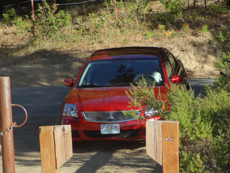

In [17]:
img

In [18]:
img2 = img.crop((50, 50, 150, 150)).resize((32, 32), resample=Image.BICUBIC)
img3 = img.crop((0, 0, 60, 60)).resize((32, 32), resample=Image.BICUBIC)

In [19]:
img2.size

(32, 32)

In [20]:
import numpy as np

data2 = np.asarray(img2).astype(np.float32) / 255.
data3 = np.asarray(img3).astype(np.float32) / 255.

In [21]:
data2

array([[[0.28627452, 0.25490198, 0.2       ],
        [0.30588236, 0.27058825, 0.21568628],
        [0.3529412 , 0.30980393, 0.24313726],
        ...,
        [0.2       , 0.14117648, 0.08235294],
        [0.19607843, 0.13333334, 0.08235294],
        [0.18431373, 0.1254902 , 0.08235294]],

       [[0.21176471, 0.20784314, 0.1882353 ],
        [0.22745098, 0.21568628, 0.2       ],
        [0.21568628, 0.20392157, 0.18431373],
        ...,
        [0.22745098, 0.19607843, 0.23921569],
        [0.21176471, 0.1764706 , 0.21568628],
        [0.20784314, 0.16078432, 0.1882353 ]],

       [[0.2       , 0.2       , 0.19607843],
        [0.2       , 0.2       , 0.19215687],
        [0.19607843, 0.19607843, 0.1882353 ],
        ...,
        [0.16078432, 0.1764706 , 0.3254902 ],
        [0.16078432, 0.1764706 , 0.32156864],
        [0.16470589, 0.1764706 , 0.31764707]],

       ...,

       [[0.827451  , 0.61960787, 0.3764706 ],
        [0.70980394, 0.54901963, 0.42352942],
        [0.8980392 , 0

In [22]:
import keras.models as models

filename = "cardetector.keras"

model = models.load_model(filename)

In [23]:
print(data2.shape)

(32, 32, 3)


In [27]:
ypred2 = model.predict(data2.reshape(1, 32, 32, 3))
print(ypred2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.8186887]]


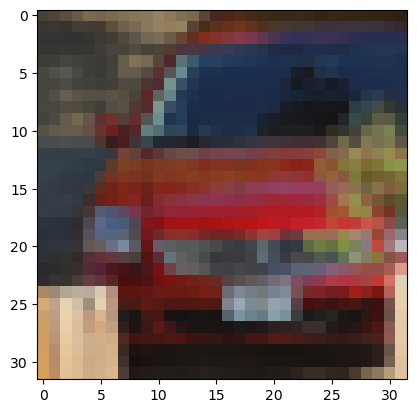

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data2)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[7.4069276e-06]]


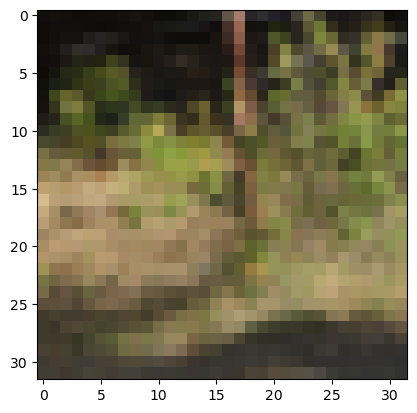

In [28]:
ypred3 = model.predict(data3.reshape(1, 32, 32, 3))
print(ypred3)
plt.imshow(data3)
plt.show()